<a href="https://colab.research.google.com/github/AshAninze/Uni-Projects/blob/main/Bias_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Measuring and Mitigating Biases with AI using FairLearn

This notebook aims to measure and mitigate biases within ML models using the Fairlearn package created by Microsoft. This colab notebook will be covering the biases within the adult dataset

# Initalisation

In [1]:
#importing needed libaries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score, train_test_split, KFold, cross_val_predict
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from yellowbrick.classifier import ClassificationReport
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks
from collections import Counter
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [2]:
#loading the dataset to be used
adult = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Diss/adult.csv')


#Building Adult Machine Learning Model

This section contains the development of the Machine Learning model before any bias mitigation

## Initalisation of the datasets


In [3]:
# displaying dataset before any preprocessing technqiues
adult.head()


age          workclass  fnlwgt   education  education-num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   

        marital-status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital-gain  captial-loss  hours-per-week  native-country  income  
0          2174             0              40   United-States   <=50K  
1             0             0              13   United-States   <=50K  
2             0             0              40   United-States   <=50K  
3             0             0              40   United-States   <=50K  
4             0             0              40            Cuba   <=50K

### Renaming income as the target variable




In [4]:
#renaiming income to target variable
adult = adult.rename(columns={
    'income' : 'target'
})

adult.head()

age          workclass  fnlwgt   education  education-num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   

        marital-status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital-gain  captial-loss  hours-per-week  native-country  target  
0          2174             0              40   United-States   <=50K  
1             0             0              13   United-States   <=50K  
2             0             0              40   United-States   <=50K  
3             0             0              40   United-States   <=50K  
4             0             0              40            Cuba   <=50K

## EDA

#### Correlation

The correlation matrix code only runs after peforming one hot encoding

In [5]:
#calulates the correlation matrix for adult dataset
correlation_matrix = adult.corr()
#plots the size of the figure
plt.figure(figsize=(12, 8))
# hides the upper half of the matrix
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
#heatmap to easily diffrintiate between postive and negative correlations
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, mask=mask)
#titling
plt.title('Correlation Matrix')


plt.show()

ValueError: could not convert string to float: ' State-gov'

Discription of the attributes

In [5]:
adult.describe()

age        fnlwgt  education-num  capital-gain  captial-loss  \
count  32561.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean      38.581647  1.897784e+05      10.080679   1077.648844     87.303830   
std       13.640433  1.055500e+05       2.572720   7385.292085    402.960219   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370510e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       hours-per-week  
count    32561.000000  
mean        40.437456  
std         12.347429  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000

<BarContainer object of 2 artists>

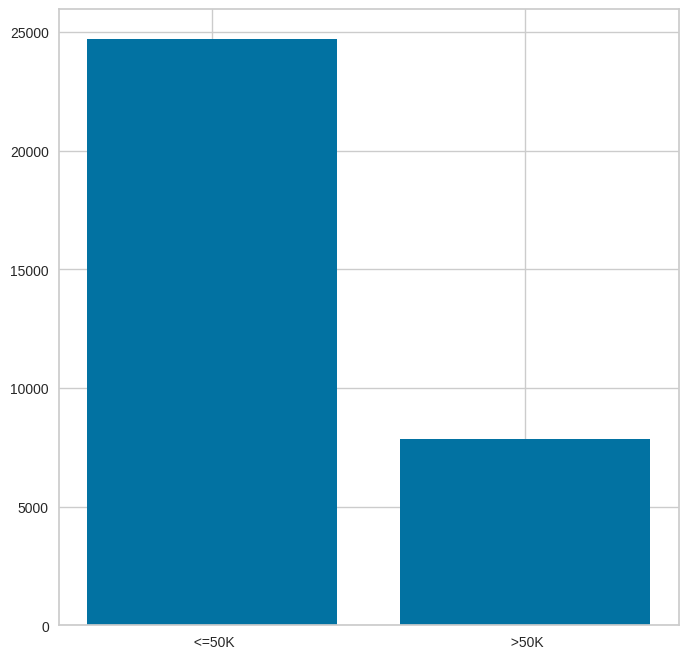

In [26]:
y = adult['target']
distribution = y.value_counts()
plt.figure(figsize=(8, 8))
plt.bar(distribution.index, distribution.values)

In [48]:
adult['target'].value_counts()

target
 <=50K    24720
 >50K      7841
Name: count, dtype: int64

#### Distribution of attributes grouped by target

Distribution of race

([0, 1, 2, 3, 4],
 [Text(0, 0, ' White'),
  Text(1, 0, ' Black'),
  Text(2, 0, ' Asian-Pac-Islander'),
  Text(3, 0, ' Amer-Indian-Eskimo'),
  Text(4, 0, ' Other')])

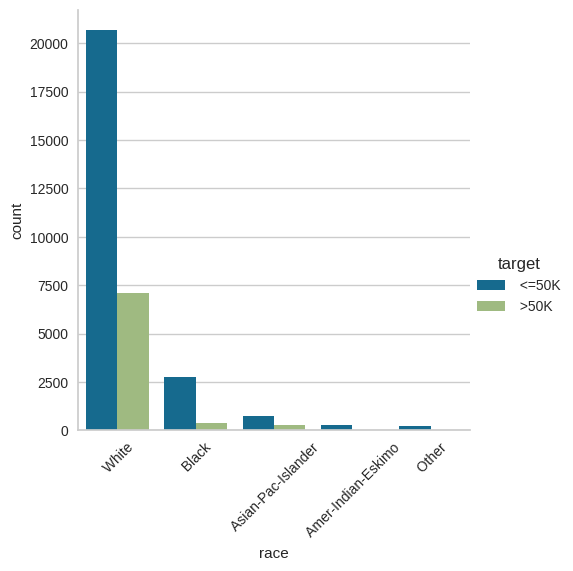

In [17]:
sns.catplot(x='race', kind='count', hue='target', data=adult)
plt.xticks(rotation=45) #to fix the label overlapping

Distribution of sex

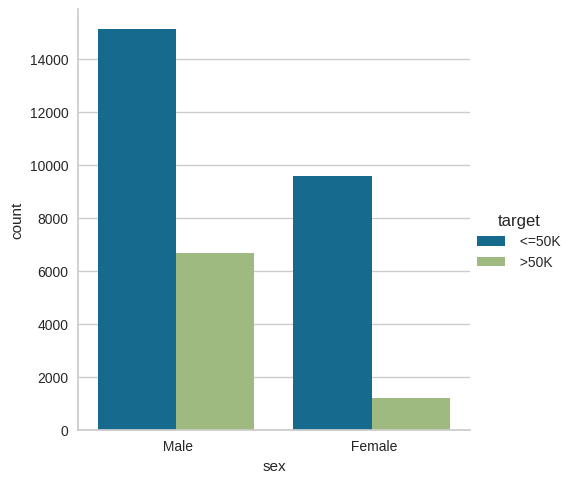

In [5]:
sns.catplot(x='sex', kind='count', hue='target', data=adult)

In [7]:
female = adult[(adult['sex'] == 'Female')]
female_above_50k = adult[(adult['sex'] == 'Female') & (adult['target'] == '>50K')]
print(female_above_50k)
#percentage_female_above_50k = (len(female_above_50k) / len(female)) * 100

#print(f"The percentage of women who make more than $50k: {percentage_female_above_50k:.2f}%")


Empty DataFrame
Columns: [age, workclass, fnlwgt, education, education-num, marital-status, occupation, relationship, race, sex, capital-gain, captial-loss, hours-per-week, native-country, target]
Index: []


In [19]:
average_age_by_income = adult.groupby('target')['age'].mean()
print(average_age_by_income)


target
 <=50K    36.783738
 >50K     44.249841
Name: age, dtype: float64


<Axes: xlabel='age'>

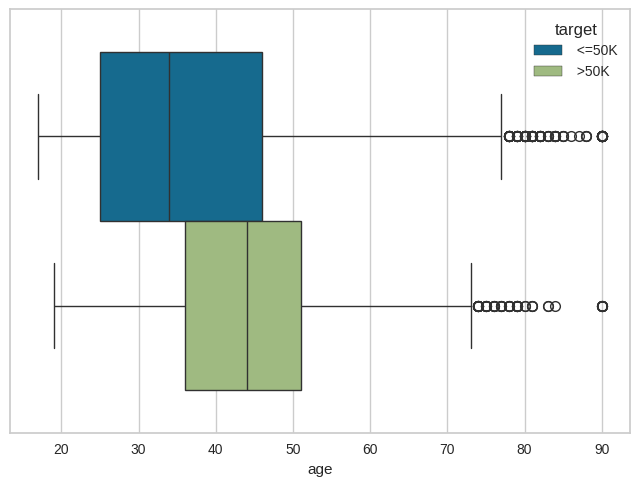

In [10]:
sns.boxplot(x = 'age', hue='target',  data=adult)

In [21]:
adult.sex.value_counts(normalize=True)

sex
 Male      0.669205
 Female    0.330795
Name: proportion, dtype: float64

## Feature Engineering

### Empty Rows/ Invalid Rows replacement

In [6]:
adult.replace(' ?', pd.NA, inplace=True)


calulating the mode of each atrribute so i can replace the empty values with the mode

In [7]:
adult.mode()

age workclass  fnlwgt education  education-num       marital-status  \
0  36.0   Private  123011   HS-grad            9.0   Married-civ-spouse   
1   NaN       NaN  164190       NaN            NaN                  NaN   
2   NaN       NaN  203488       NaN            NaN                  NaN   

        occupation relationship    race    sex  capital-gain  captial-loss  \
0   Prof-specialty      Husband   White   Male           0.0           0.0   
1              NaN          NaN     NaN    NaN           NaN           NaN   
2              NaN          NaN     NaN    NaN           NaN           NaN   

   hours-per-week  native-country  target  
0            40.0   United-States   <=50K  
1             NaN             NaN     NaN  
2             NaN             NaN     NaN

In [8]:
# This is to check wether the dataset has any missing values
missing= adult.isna().sum()
print (missing)

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
captial-loss         0
hours-per-week       0
native-country     583
target               0
dtype: int64


In [12]:
# replacing the empty values
adult['workclass'].fillna('Private', inplace=True)
adult['occupation'].fillna('Prof-specialty', inplace=True)
adult['native-country'].fillna('United-States', inplace=True)

In [13]:
# This is to check wether the dataset has any missing values
missing= adult.isna().sum()
print (missing)


age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
captial-loss      0
hours-per-week    0
native-country    0
target            0
dtype: int64


Checking for duplicated rows

In [14]:
duplicates = adult.duplicated()
duplicates.sum()

24

### One hot encoding (Brownlee, 2020)

In [15]:
#creating a list of all columns within the dataset
columns = adult.columns.tolist()
#The encoder - encodes values between 1 and number of columns - 1
encoder = LabelEncoder()

#for loop encoding all columns within the dataset
for i in range(len(columns)):
  adult[columns[i]] = encoder.fit_transform(adult[columns[i]])

#Displays the encoded dataset
adult.head()


age  workclass  fnlwgt  education  education-num  marital-status  \
0   22          6    2671          9             12               4   
1   33          5    2926          9             12               2   
2   21          3   14086         11              8               0   
3   36          3   15336          1              6               2   
4   11          3   19355          9             12               2   

   occupation  relationship  race  sex  capital-gain  captial-loss  \
0           0             1     4    1            25             0   
1           3             0     4    1             0             0   
2           5             1     4    1             0             0   
3           5             0     2    1             0             0   
4           9             5     2    0             0             0   

   hours-per-week  native-country  target  
0              39              38       0  
1              12              38       0  
2              39              38       0  
3              39              38       0  
4              39               4       0

## Preprocessing


### Splitting the dataset

In [16]:
#splitting the dataset into features and target
X = adult.drop('target', axis = 1)
y = adult['target']
#spliting data into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20,
                                                    random_state = 42)

x_test_bias = X_test
# The following is the shapes of the individulal train and test sets for x and y
X_train.shape

(26048, 14)

In [17]:
#The dataset is unbalanced - oversampling to balance target values
from imblearn.over_sampling import SMOTE
over = SMOTE()
X_train, y_train = over.fit_resample(X_train, y_train)

#creating new dataframe with the balanced train data
#X_train_df = pd.DataFrame(X_train, columns=X.columns)
#y_train_df = pd.DataFrame(y_train, columns=['target'])

#df = pd.concat([X_train_df, y_train_df], axis=1)

In [18]:
#standardising training data for the features
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [15]:
X_test.shape

(6033, 14)

In [16]:
y_train.shape

(36302,)

In [17]:
y_test.shape

(6033,)

In [18]:
# checking the balance of the target variable
y_test.value_counts()

target
0    4503
1    1530
Name: count, dtype: int64

In [19]:
y_train.value_counts()

target
0    18151
1    18151
Name: count, dtype: int64

## ML Models

### Random Forest Model

In [31]:
# RFM for the dataset

#defining the RFM model -  specifying the number of trees in the RM (100)
clf_rf = RandomForestClassifier(n_estimators=200)
clf_rf.fit(X_train, y_train)
y_pred = clf_rf.predict(X_test)
rf_acc = accuracy_score(y_test, y_pred)
print(rf_acc)

0.8466144633809305


### Gradient Boosting Classifier

An ensemble model

In [56]:
from xgboost import XGBClassifier

GBC = XGBClassifier(n_estimators=100)
GBC.fit(X_train, y_train)
y_pred = GBC.predict(X_test)
gbc_acc = accuracy_score(y_test, y_pred)
print(gbc_acc)

0.8635037617073545


### Suport Vector Machine Model

SVM is a good algorithm for unbalanced datasets, but in this case the GBC Model outperforms therfore for this project GBC Model will be used

In [20]:
# Support Vector Machine Model
clf_svm = SVC()
clf_svm.fit(X_train, y_train)
y_pred = clf_svm.predict(X_test)
svm_acc = accuracy_score(y_test, y_pred)
print(svm_acc)

0.8211269768155995


#### Cross validation


In [46]:
#defining the amount of folds to use in CV -  this defines how many times the model is trained

#Performing CV
cv_scores = cross_val_score(GBC, X_train, y_train, cv=5)
print(cv_scores)



[0.76946411 0.86360763 0.93376311 0.93603843 0.93527999]


In [47]:
y_pred = cross_val_predict(clf_rf, X_test, y_test, cv=6)

In [48]:
accuracy = accuracy_score(y_test, y_pred)
print("Cross-validated Accuracy:", accuracy)

Cross-validated Accuracy: 0.8572086596038692


### Hyperparameter tuning

This section will involve using GridSearchCV to find the best parameters for my machine learning model to improve the accuracy score

In [51]:
from sklearn.model_selection import GridSearchCV

#Different parameters to iterate from
param_grid = {
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [4, 6, 8],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8],
    'n_estimators': [100, 200, 300]
}

#intialising the grid search
grid_search = GridSearchCV(GBC, param_grid, cv=5, scoring='accuracy')

#performing the grid search
grid_search.fit(X_train, y_train)

#getting the best params
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

#using the best model for the prediction
y_pred = best_model.predict(X_test)

#calulating the new accuracy score
gbc_acc = accuracy_score(y_test, y_pred)
print("Improved Gradient Boosting Classifier accuracy:", gbc_acc_acc)

Improved Random Forest accuracy: 0.8550591125441425


This section is using a randomised paramater search while using Cross Validation. Random search is utilized as it has a shorter processing time compared to GridSearchCV

In [52]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint #for randomised numbers

param= {
    'n_estimators': randint(50, 150), # random number from 50 - 150
    'max_depth': [None, 10, 20],
    'learning_rate': [0.05, 0.1, 0.2]
}

random = RandomizedSearchCV(estimator=GBC,
                            param_distributions=param,
                            n_iter=10, cv =6, scoring= 'accuracy',
                            random_state=42)

random.fit(X_train, y_train)

best_params = random.best_params_
best_estimator = random.best_estimator_

In [53]:
print(best_params)

{'learning_rate': 0.2, 'max_depth': 10, 'n_estimators': 132}


In [54]:
y_pred = best_estimator.predict(X_test)
gbc_acc = accuracy_score(y_test, y_pred)
print("Improved Gradient Boosting Classifier accuracy:", gbc_acc)

Improved Random Forest accuracy: 0.8618148318747121


In [57]:
#classifiction report
report = classification_report(y_test, y_pred, target_names=['Under 50K','Over 50k'], output_dict=True)

#formating
def format_classification_report(report):
    formatted_report = f"{'Class':<15}{'Precision':<10}{'Recall':<10}{'F1-Score':<10}{'Support':<10}\n"
    for class_name, metrics in report.items():
        if class_name in ['accuracy', 'macro avg', 'weighted avg']:
            continue
        formatted_report += f"{class_name:<15}{metrics['precision']:.2f}{' ' * 6}{metrics['recall']:.2f}{' ' * 6}{metrics['f1-score']:.2f}{' ' * 6}{metrics['support']}\n"
    return formatted_report

# Print the formatted report
print(format_classification_report(report))

Class          Precision Recall    F1-Score  Support   
Under 50K      0.91      0.91      0.91      4942
Over 50k       0.71      0.73      0.72      1571



### Feature Importance
 This section will be covering the features that are most important on predicting wether someones income is over 50K or not

In [30]:
# caluslating the most important features when using the RM model for predictions
importances = clf_rf.feature_importances_

In [31]:
# labeling the columns
featureIm = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

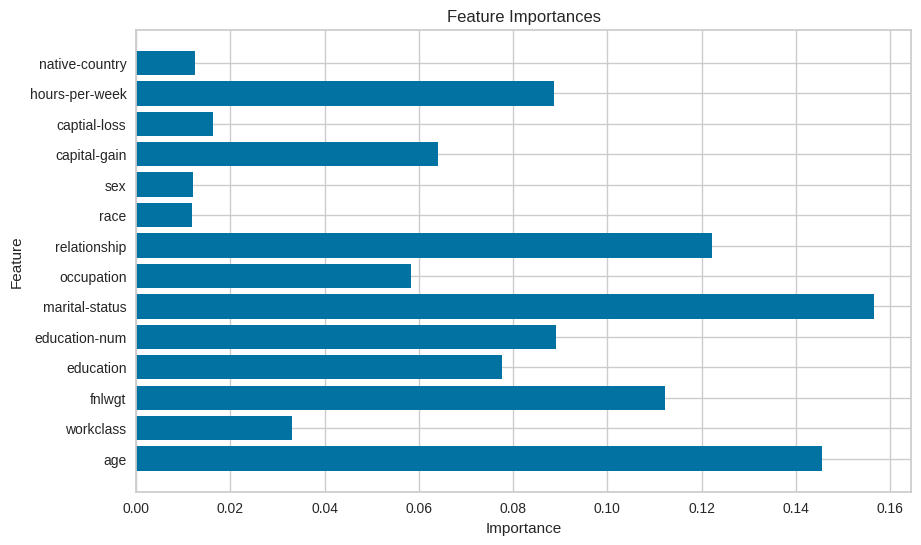

In [32]:
# plotting a barchart on the importance comparing the values between the other features
plt.figure(figsize=(10, 6))
plt.barh(featureIm['Feature'], featureIm['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()

#Fairlearn

### EDA for ML Model

This section will be analysing the prediction from the machine learning model to see how biased the outcomes are

In [ ]:
# creating a new dataset with the predidct values of Y to be able to compare the predicted values with the actual values
x_test_bias['pred'] = y_pred

x_test_bias.head()

age  workclass  fnlwgt  education  education-num  marital-status  \
14160   10          4    8535         15              9               0   
27048   28          7    1549         11              8               2   
28868   12          4   11163          9             12               2   
5667    13          4   11641          9             12               4   
7827    12          6   11564         15              9               0   

       occupation  relationship  race  sex  capital-gain  captial-loss  \
14160           1             1     4    0             0             0   
27048           4             5     4    0             0             0   
28868           4             0     2    1             0             0   
5667            7             1     4    0             0             0   
7827            3             1     4    1            27             0   

       hours-per-week  native-country  pred  
14160              37              39     0  
27048              39              39     0  
28868              54              39     1  
5667               39              39     0  
7827               49              39     0

In [ ]:
x_test_bias.describe()

age    workclass        fnlwgt    education  education-num  \
count  6513.000000  6513.000000   6513.000000  6513.000000    6513.000000   
mean     21.600798     3.859205  10490.775065    10.339628       9.081222   
std      13.626411     1.461835   6074.260438     3.866013       2.562967   
min       0.000000     0.000000      2.000000     0.000000       0.000000   
25%      11.000000     4.000000   5354.000000     9.000000       8.000000   
50%      20.000000     4.000000  10415.000000    11.000000       9.000000   
75%      31.000000     4.000000  15496.000000    12.000000      11.000000   
max      72.000000     8.000000  21644.000000    15.000000      15.000000   

       marital-status   occupation  relationship         race          sex  \
count     6513.000000  6513.000000   6513.000000  6513.000000  6513.000000   
mean         2.608475     6.569169      1.463688     3.675111     0.673576   
std          1.521832     4.234146      1.611616     0.843800     0.468940   
min          0.000000     0.000000      0.000000     0.000000     0.000000   
25%          2.000000     3.000000      0.000000     4.000000     0.000000   
50%          2.000000     7.000000      1.000000     4.000000     1.000000   
75%          4.000000    10.000000      3.000000     4.000000     1.000000   
max          6.000000    14.000000      5.000000     4.000000     1.000000   

       capital-gain  captial-loss  hours-per-week  native-country         pred  
count   6513.000000   6513.000000     6513.000000     6513.000000  6513.000000  
mean       6.811147      2.046062       39.574697       36.766621     0.247198  
std       23.725083     10.245348       12.211901        7.794399     0.431416  
min        0.000000      0.000000        0.000000        0.000000     0.000000  
25%        0.000000      0.000000       39.000000       39.000000     0.000000  
50%        0.000000      0.000000       39.000000       39.000000     0.000000  
75%        0.000000      0.000000       44.000000       39.000000     0.000000  
max      118.000000     91.000000       93.000000       41.000000     1.000000

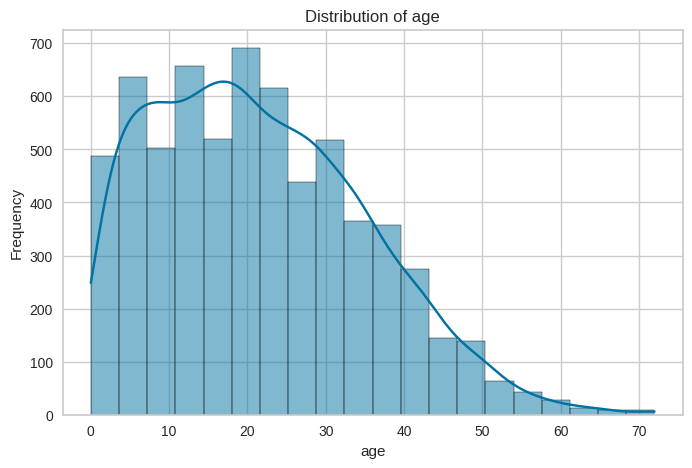

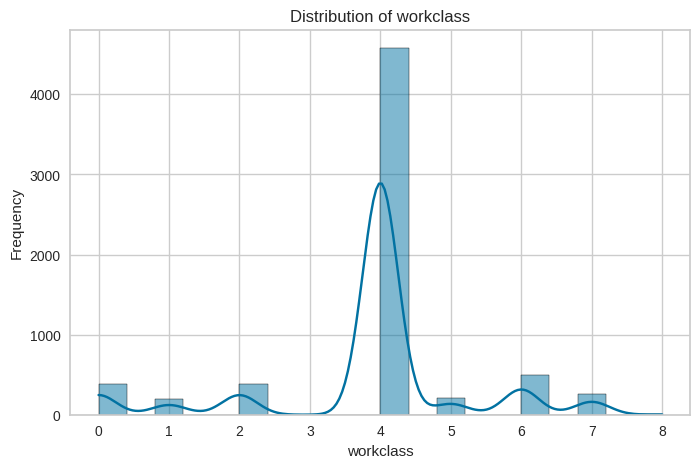

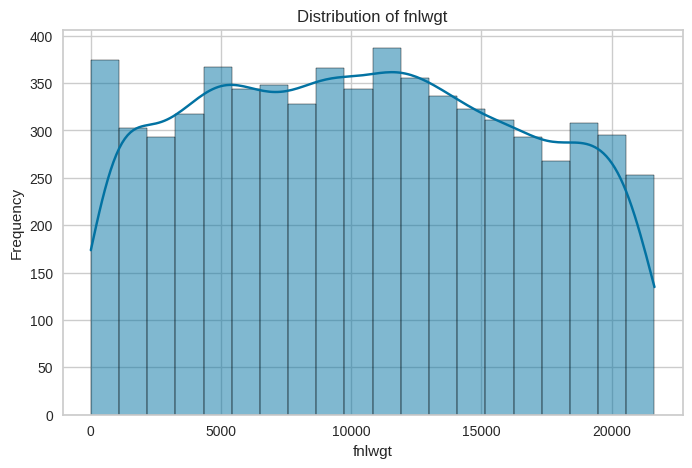

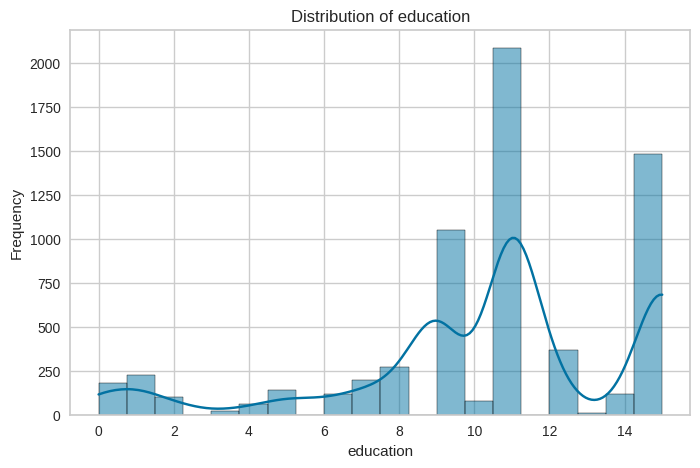

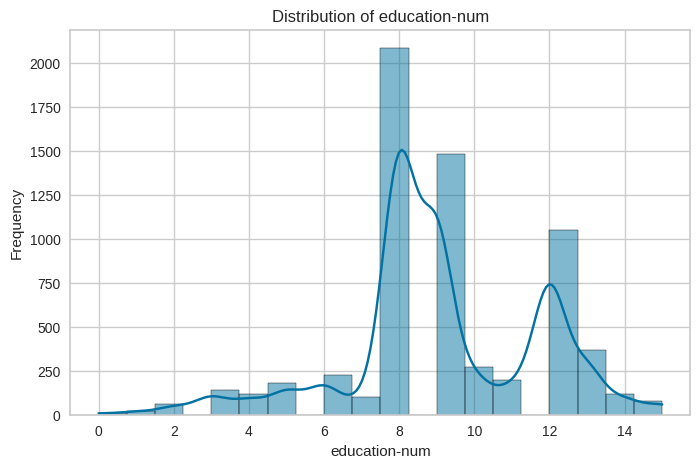

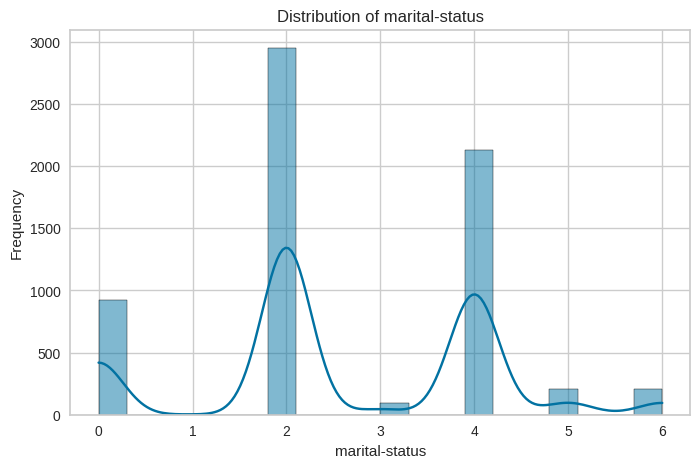

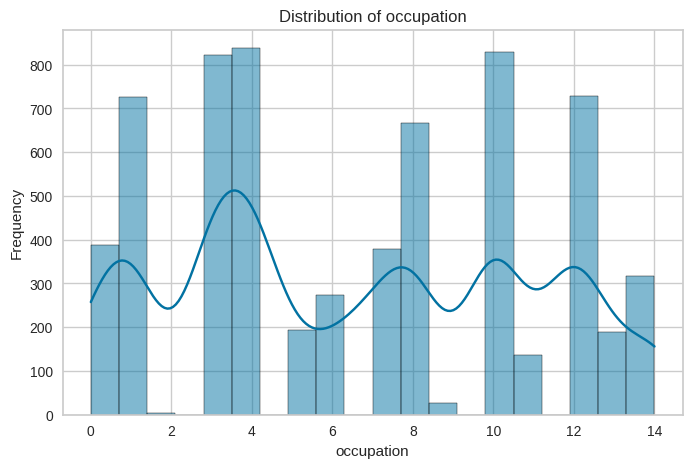

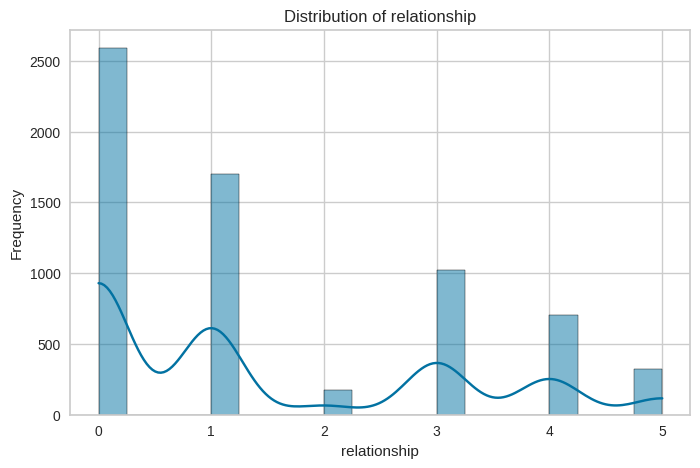

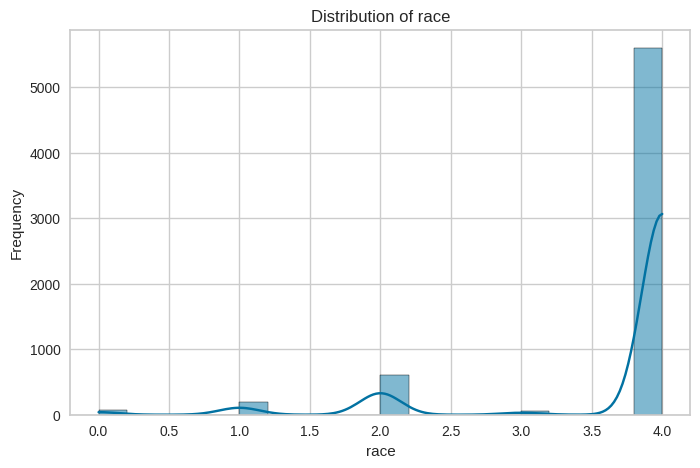

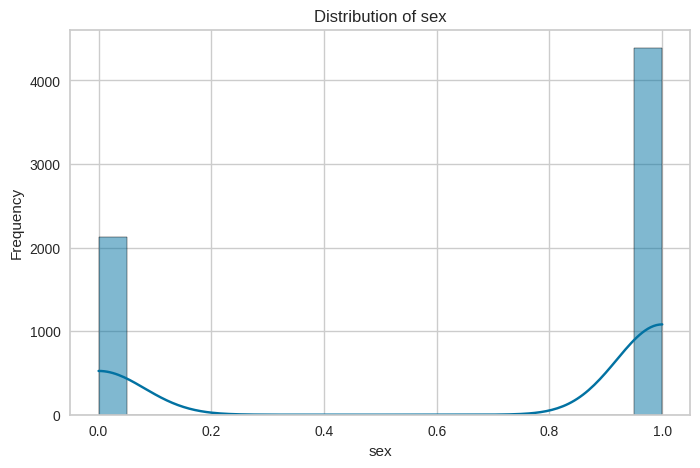

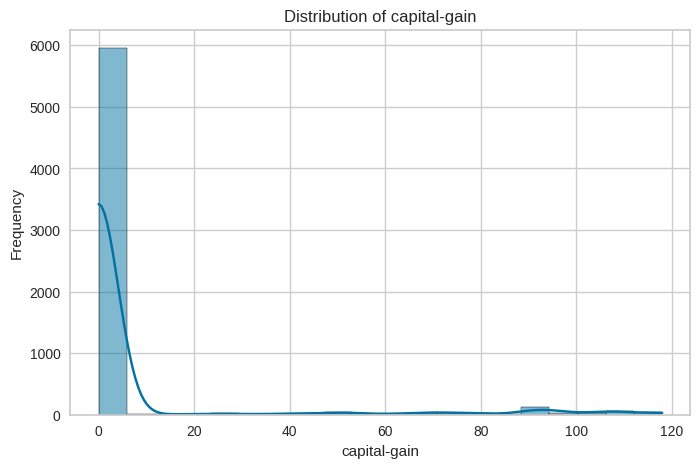

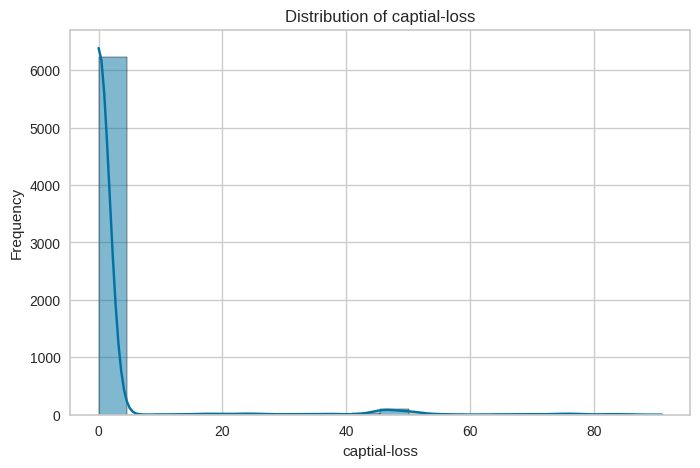

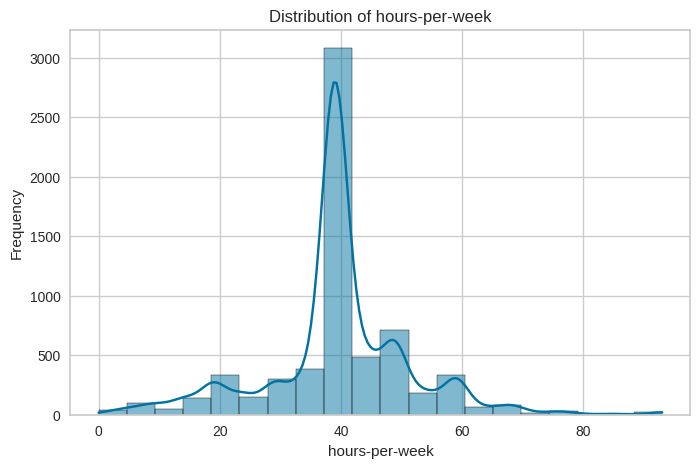

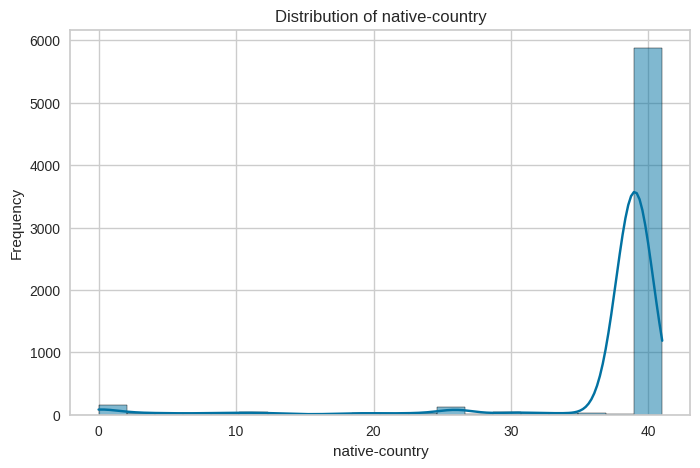

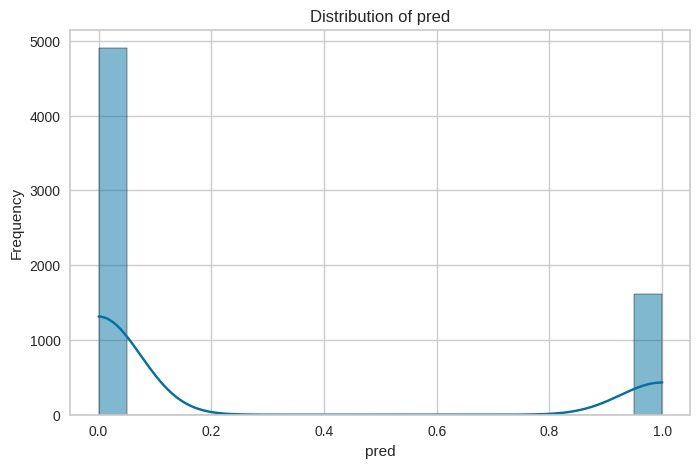

In [ ]:
numeric_features = x_test_bias.select_dtypes(include=[np.number]).columns
for feature in numeric_features:
    plt.figure(figsize=(8, 5))
    sns.histplot(x_test_bias[feature], kde=True, bins=20)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

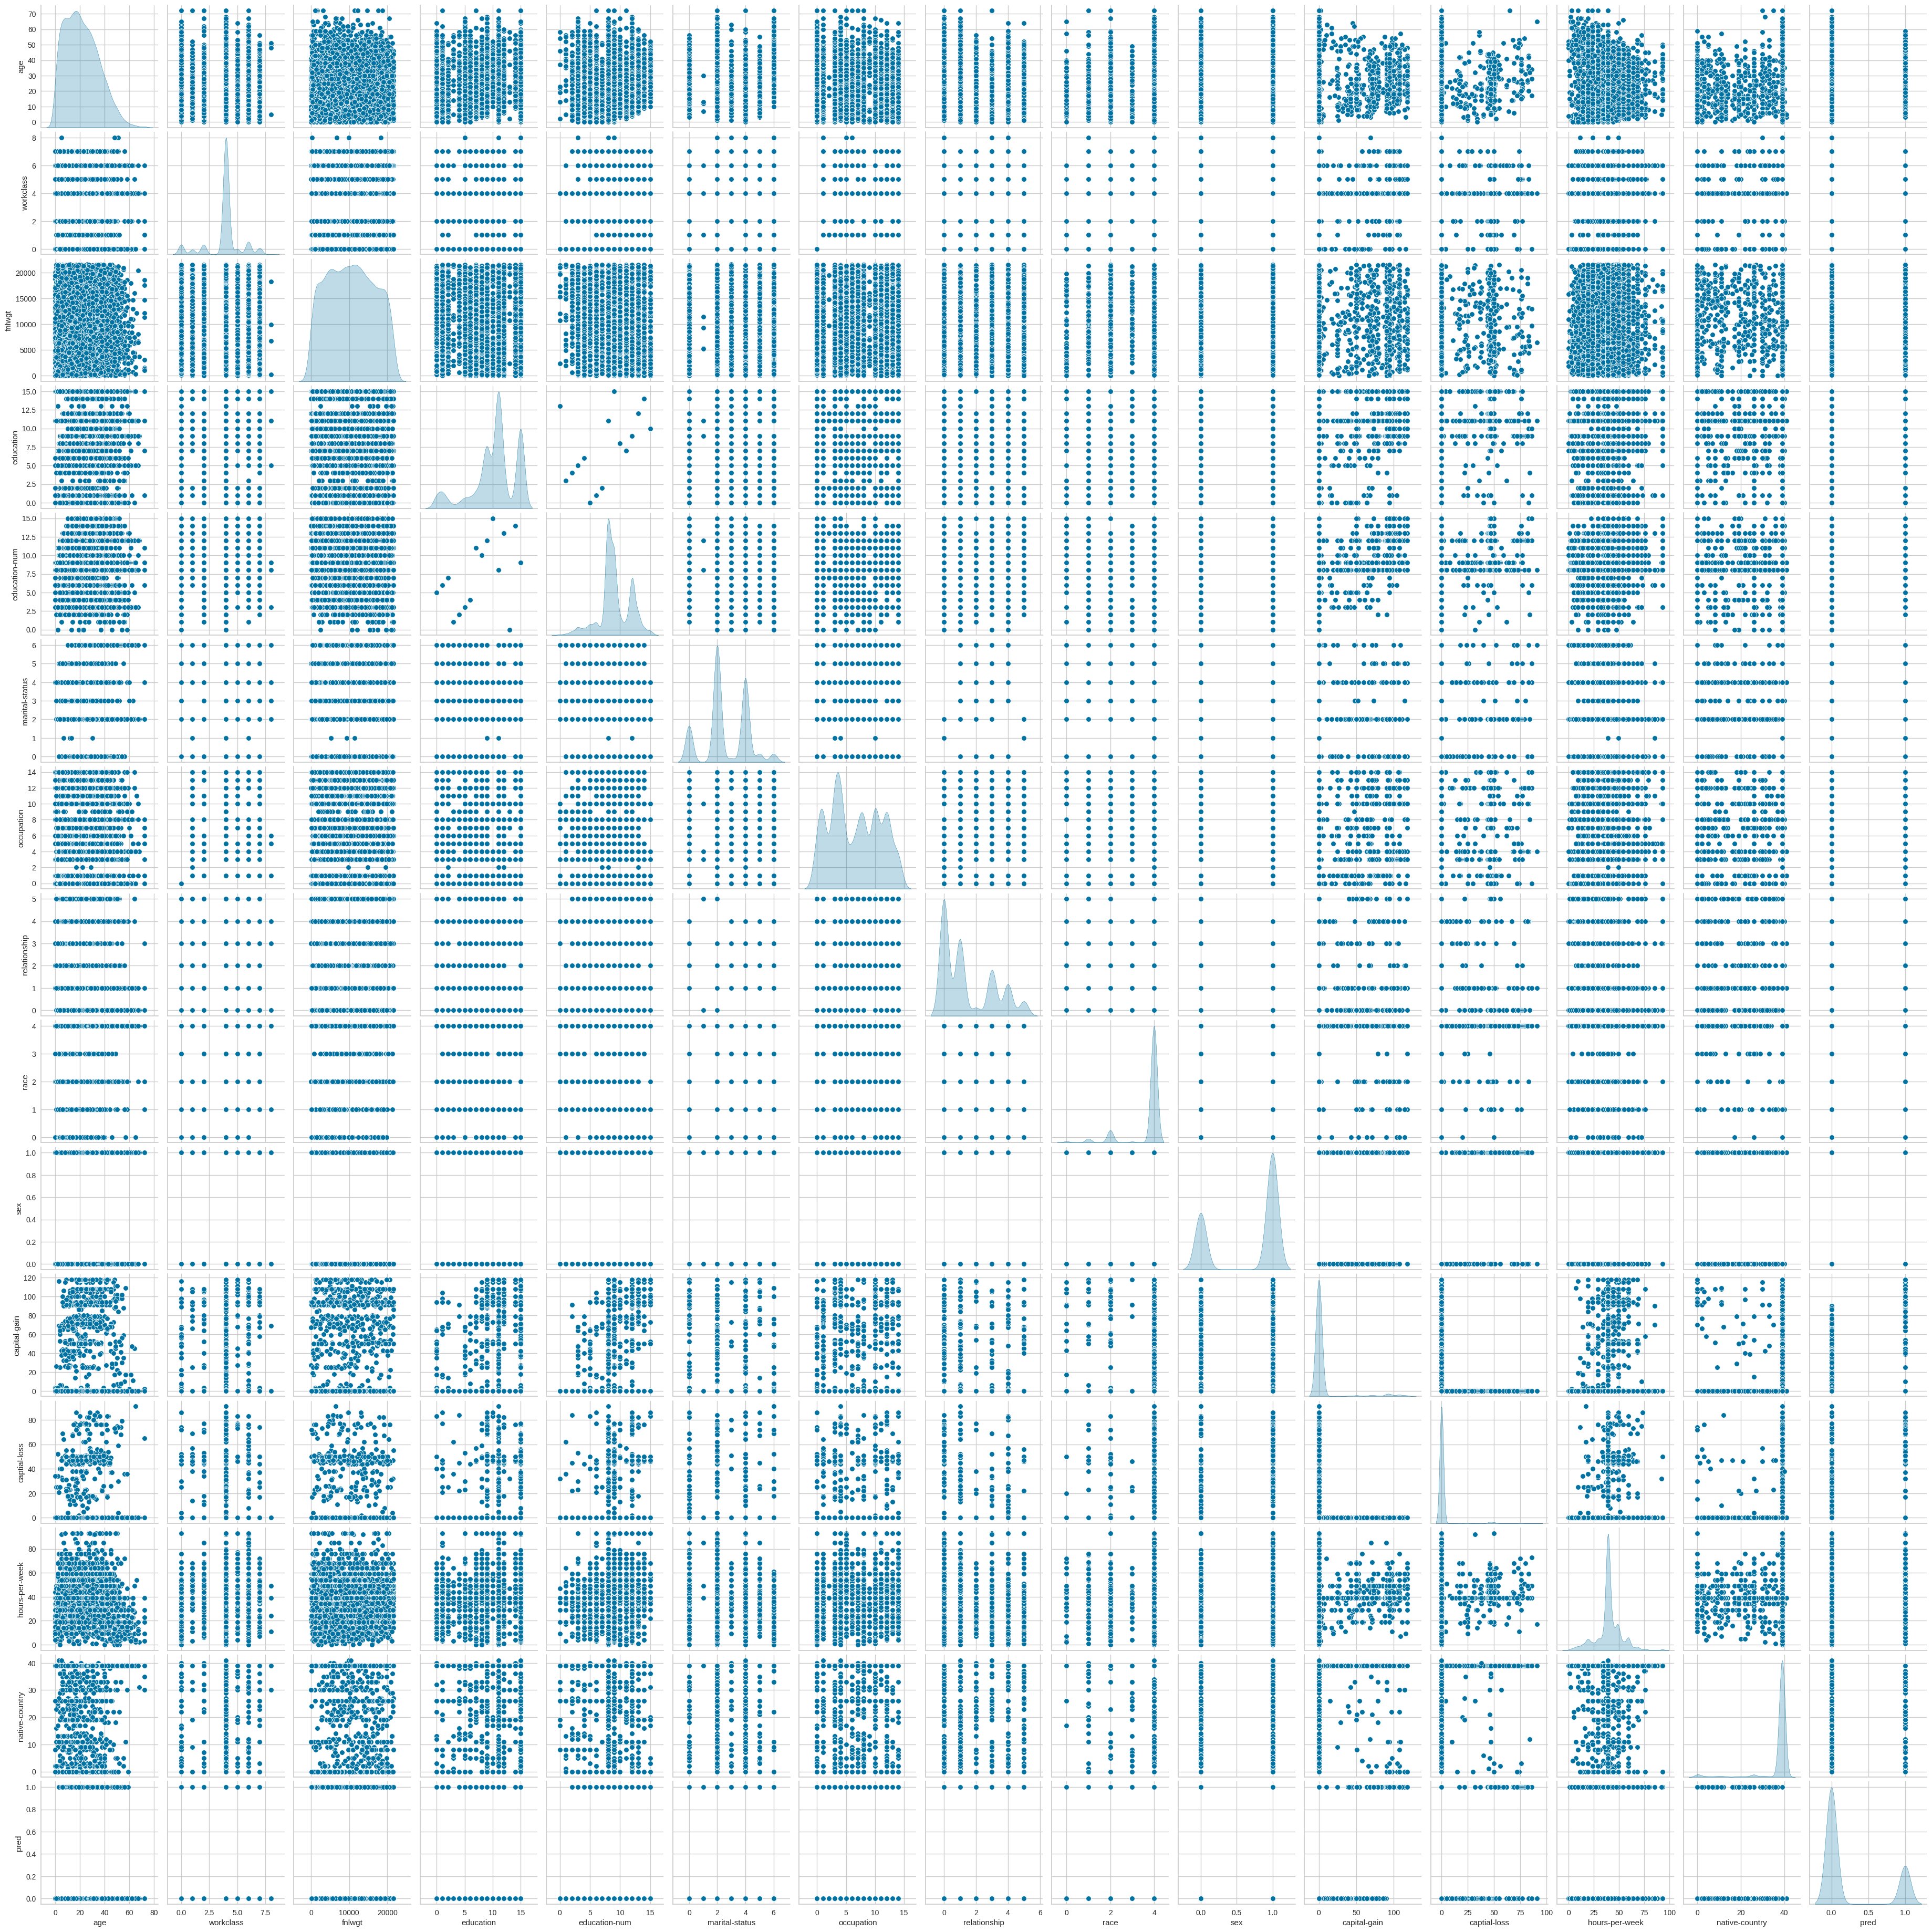

In [ ]:
sns.pairplot(x_test_bias, diag_kind='kde')
plt.show()

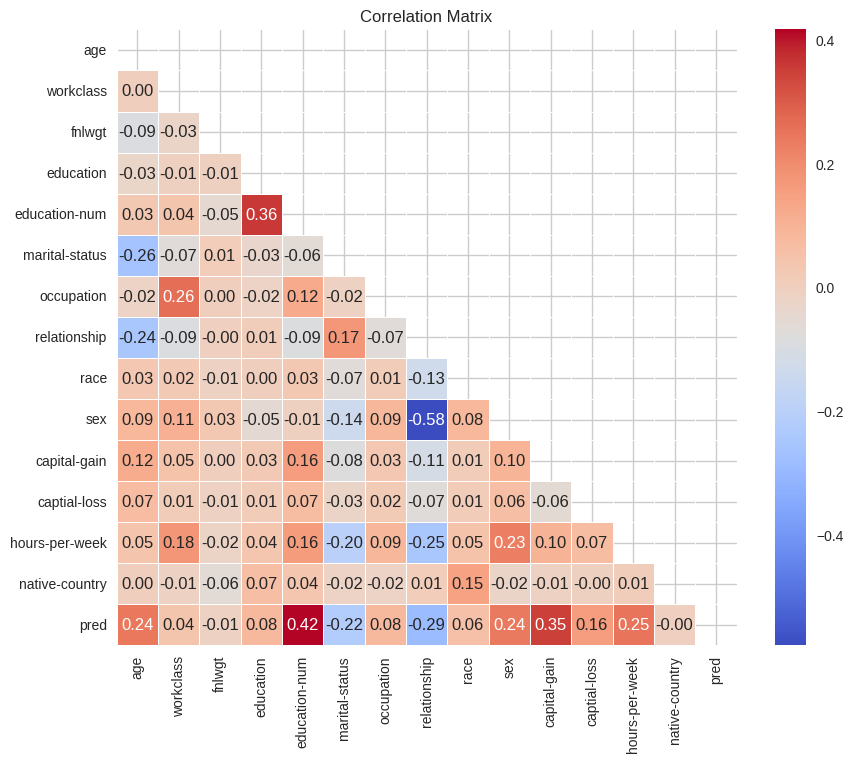

In [ ]:
plt.figure(figsize=(10, 8))
correlation_matrix = x_test_bias.corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, mask = mask)
plt.title('Correlation Matrix')
plt.show()

## Initaisation






In [ ]:
pip install fairlearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 234.1/234.1 kB 5.0 MB/s eta 0:00:00


In [ ]:
# importing packages needed
from fairlearn.metrics import MetricFrame
from fairlearn.reductions import DemographicParity, ExponentiatedGradient





## Preparing the data


In [ ]:
y_true = y_train
sex = adult['sex']


In [ ]:
y_true.shape

(36302,)

In [ ]:
sex.count()

30162

In [ ]:
y_pred_train = clf_rf.predict(X_train)
mf = MetricFrame(metrics=accuracy_score, y_true=y_true, y_pred=y_pred_train, sensitive_features=sex)
mf.overall
mf.by_group
#len(y_pred)
#len(y_true)

ValueError: Found input variables with inconsistent numbers of samples: [30162, 36302]